# MetLife Case Study: 
## Dental Practice Patterns Anomaly Detection
### Kyrsten Rudock

In [1]:
# set-up

import pandas as pd
import numpy as np
import os

os.chdir(r"C:\Users\karud\Documents\MetLife")
case = pd.read_csv(r"Dental_Anomaly_Detection_Case_Study.csv")

### Step 0: Data Exploration

In [2]:
case.describe()

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment
count,3.688800e+04,36888.000000,36888.000000,36888.000000,36888.000000,36275.000000
mean,1.122499e+05,31.184342,170.187161,8.814384,15.039823,267.653534
std,3.456498e+04,61.576077,354.232392,21.308277,37.238638,171.089924
min,2.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.064178e+05,0.000000,2.000000,0.000000,0.000000,173.415140
50%,1.192295e+05,7.000000,45.000000,2.000000,2.000000,225.197368
75%,1.316752e+05,39.000000,200.000000,10.000000,15.000000,310.000000
max,2.000007e+06,1980.000000,14725.000000,1055.000000,1221.000000,4191.100000


### Step 1: Feature Engineering

In [3]:
# add column for total number of visits
case['Total_Visits'] = case[['Crown_Count', 'Filling_Count', 'Root_Canal_Count',
       'Extract_Count']].sum(axis=1)

# assume that there is a data entry error for anyone with total_vists = 0, so remove those rows
# assume that there is not enough evidence for anyone with fewer than 5 visits, so remove those rows
case = case[case['Total_Visits'] > 4]

In [4]:
# add columns for ratios, where anything with the numerator = 0 is set to 0
# since those dentists had more of the cheaper option, so we don't need them to pop out

case['C2F'] = (case['Crown_Count'] / case['Filling_Count']).fillna(0)
case['R2C'] = (case['Root_Canal_Count'] / case['Crown_Count']).fillna(0)
case['E2C'] = (case['Extract_Count'] / case['Crown_Count']).fillna(0)

# replace inf with the value for the numerator
# that way, big numbers still pop out but can also be compared to one another

case['C2F'] = case['C2F'].replace(np.inf, case['Crown_Count'])
case['R2C'] = case['R2C'].replace(np.inf, case['Root_Canal_Count'])
case['E2C'] = case['E2C'].replace(np.inf, case['Extract_Count'])

case.head(20)

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment,Total_Visits,C2F,R2C,E2C
6,80,163,438,38,61,621.923861,700,0.372146,0.233129,0.374233
7,93,13,13,0,4,790.117857,30,1.000000,0.000000,0.307692
20,188,5,32,1,0,220.276786,38,0.156250,0.200000,0.000000
21,192,1,4,0,0,210.346667,5,0.250000,0.000000,0.000000
24,233,4,5,1,0,256.229412,10,0.800000,0.250000,0.000000
25,250,49,37,2,2,172.468221,90,1.324324,0.040816,0.040816
38,514,0,21,0,0,394.461538,21,0.000000,0.000000,0.000000
39,518,2,19,0,8,361.355556,29,0.105263,0.000000,4.000000
40,553,3,11,2,3,313.052941,19,0.272727,0.666667,1.000000
41,561,1,2,2,0,942.666667,5,0.500000,2.000000,0.000000


In [5]:
case.describe()

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment,Total_Visits,C2F,R2C,E2C
count,2.667700e+04,26677.000000,26677.000000,26677.000000,26677.000000,26309.000000,26677.000000,26677.000000,26677.000000,26677.000000
mean,1.180862e+05,43.090790,235.130487,12.174907,20.755520,252.556270,311.151704,0.292603,0.321006,2.217985
std,2.748539e+04,68.780614,397.837146,24.228405,42.419572,117.406048,490.184477,0.893057,0.444279,17.274407
min,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,1.093810e+05,4.000000,31.000000,1.000000,1.000000,180.822868,47.000000,0.083333,0.045455,0.033333
50%,1.212880e+05,21.000000,113.000000,5.000000,7.000000,224.092188,162.000000,0.185185,0.201342,0.321739
75%,1.327570e+05,56.000000,289.000000,14.000000,24.000000,289.164919,393.000000,0.333333,0.416107,0.904762
max,1.000013e+06,1980.000000,14725.000000,1055.000000,1221.000000,2011.200000,17340.000000,107.500000,22.000000,1100.000000


### Step 2: Visualize outliers
- check out Per_Visit_Payment vs. C2F, R2C, and E2C to look for dentists who lean toward more expensive procedures

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

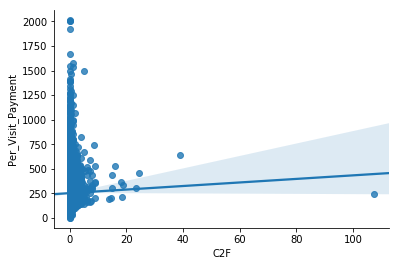

In [7]:
sns.regplot(x="C2F", y="Per_Visit_Payment", data=case)
sns.despine();

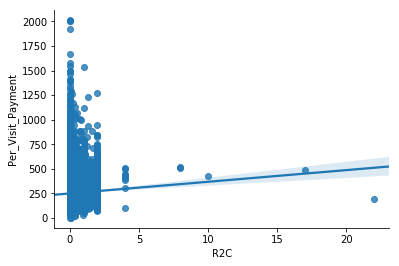

In [8]:
sns.regplot(x="R2C", y="Per_Visit_Payment", data=case)
sns.despine();

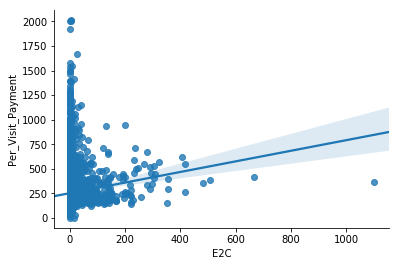

In [9]:
sns.regplot(x="E2C", y="Per_Visit_Payment", data=case)
sns.despine();

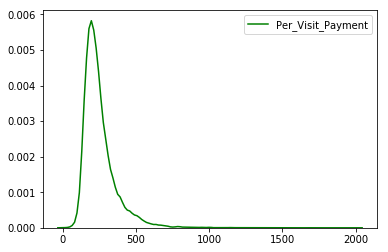

In [47]:
y = case['Per_Visit_Payment'].dropna()
sns.kdeplot(y, color='g')

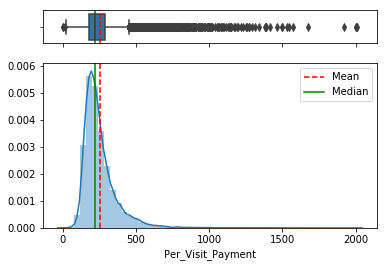

In [49]:
# example with median and mean indicated

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=y.mean()
median=y.median()

sns.boxplot(y, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(y, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

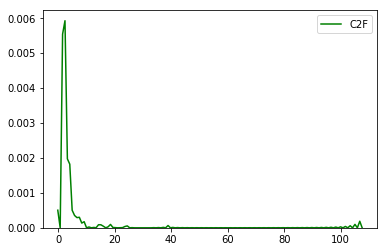

In [28]:
y = case['C2F']
sns.kdeplot(y, color='g')

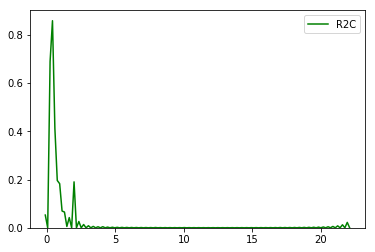

In [29]:
y = case['R2C']
sns.kdeplot(y, color='g')

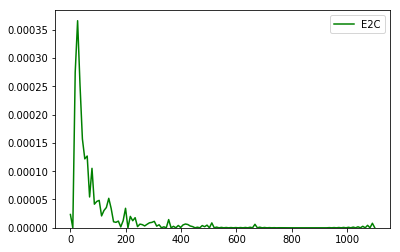

In [32]:
y = case['E2C']
sns.kdeplot(y, color='g')
# note subsequent spikes

## Step 3: Add columns for outliers
- first, create variable for upper limit in C2F, R2C, E2C, and Per_Visit_Payment
- next, add a flag variable for each. If that dentist has a value that is deemed too high, then they get a flag
- lastly, we can pull a subset of dentists who had both a high Per_Visit_Payment and a high ratio for C2F, R2C, or E2C

In [10]:
case.head()

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment,Total_Visits,C2F,R2C,E2C
6,80,163,438,38,61,621.923861,700,0.372146,0.233129,0.374233
7,93,13,13,0,4,790.117857,30,1.000000,0.000000,0.307692
20,188,5,32,1,0,220.276786,38,0.156250,0.200000,0.000000
21,192,1,4,0,0,210.346667,5,0.250000,0.000000,0.000000
24,233,4,5,1,0,256.229412,10,0.800000,0.250000,0.000000


In [11]:
# first, create a function to return the upper limit of the provided column
def find_anomalies(random_data):
    # Set upper limit to 1 standard deviation away from the mean
    n = 1
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * n
    upper_limit = random_data_mean + anomaly_cut_off
    return upper_limit

# next, create a function to add a flag for any rows that have values above the upper limit
# in this case, apply to C2F
def flag(row):
    if row['C2F'] > find_anomalies(case['C2F']): #note: reference the find_anomalies function
        return 1
    else:
        return 0

# finally, apply the flag function as a new column
    
case['Flag_C2F'] = case.apply(lambda row: flag(row), axis=1)

# repeat for R2C

def flag(row):
    if row['R2C'] > find_anomalies(case['R2C']):
        return 1
    else:
        return 0
    
case['Flag_R2C'] = case.apply(lambda row: flag(row), axis=1)

# repeat for E2C

def flag(row):
    if row['E2C'] > find_anomalies(case['E2C']):
        return 1
    else:
        return 0
    
case['Flag_E2C'] = case.apply(lambda row: flag(row), axis=1)


# repeat for Per_Visit_Payment

# change the anomaly detection to be higher for average payment since that variable had a wider range in the plot above

def find_anomalies(random_data):
    # Set upper limit to 2 standard deviations away from the mean
    n = 2
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * n
    upper_limit = random_data_mean + anomaly_cut_off
    return upper_limit

def flag(row):
    if row['Per_Visit_Payment'] > find_anomalies(case['Per_Visit_Payment']):
        return 1
    else:
        return 0
    
case['Flag_Per_Visit_Payment'] = case.apply(lambda row: flag(row), axis=1)

case.head()

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment,Total_Visits,C2F,R2C,E2C,Flag_C2F,Flag_R2C,Flag_E2C,Flag_Per_Visit_Payment
6,80,163,438,38,61,621.923861,700,0.372146,0.233129,0.374233,0,0,0,1
7,93,13,13,0,4,790.117857,30,1.000000,0.000000,0.307692,0,0,0,1
20,188,5,32,1,0,220.276786,38,0.156250,0.200000,0.000000,0,0,0,0
21,192,1,4,0,0,210.346667,5,0.250000,0.000000,0.000000,0,0,0,0
24,233,4,5,1,0,256.229412,10,0.800000,0.250000,0.000000,0,0,0,0


In [36]:
case.head()

,Dentist_Id,Crown_Count,Filling_Count,Root_Canal_Count,Extract_Count,Per_Visit_Payment,Total_Visits,C2F,R2C,E2C,Flag_C2F,Flag_R2C,Flag_E2C,Flag_Per_Visit_Payment
6,80,163,438,38,61,621.923861,700,0.372146,0.233129,0.374233,0,0,0,1
7,93,13,13,0,4,790.117857,30,1.000000,0.000000,0.307692,0,0,0,1
20,188,5,32,1,0,220.276786,38,0.156250,0.200000,0.000000,0,0,0,0
21,192,1,4,0,0,210.346667,5,0.250000,0.000000,0.000000,0,0,0,0
24,233,4,5,1,0,256.229412,10,0.800000,0.250000,0.000000,0,0,0,0


In [13]:
# subset with only dentists who were flagged for high Per_Visit_Payment and a high ratio for C2F, R2C, or E2C
detect = case.loc[(case['Flag_Per_Visit_Payment'] == 1)]
detect.shape

(1126, 14)

In [14]:
detect_subset = detect.loc[(case['Flag_C2F'] == 1) | (case['Flag_R2C'] == 1) | (case['Flag_E2C'] == 1 )]
detect_subset.shape

(265, 14)

In [35]:
list = detect_subset[['Dentist_Id']]

list.to_csv(r"List_of_Providers.csv", index=False)

### Ideas for next steps:
- Test different specifications for the flag variable (ex: only flag dentists with values that are 3 standard deviations way from the mean) based on what you deem is enough of an anomoly to investigate
- For the output list of providers, add a column that indicates which of the ratios was/were flagged
- Prove that this subset of dentists are different from the rest of the dentists using t-tests
- Provide a prioritized list of dentists deemed suspicious using maximum likelihood estimation using logistic regression

# THANK YOU AND HAVE A GREAT DAY